In [74]:
import os
import sys

# To run the code, replace the following with something appropriate for your setup
if "[redacted]/y0/src/" not in sys.path:
    sys.path.append("[redacted]y0/src/")

In [75]:
# Previous notebook imports
from y0.dsl import (
    One,
    P,
    A,
    B,
    C,
    D,
    Q,
    R,
    S,
    T,
    W,
    W1,
    W2,
    W3,
    W4,
    W5,
    X,
    Y,
    Z,
    Zero,
    Sum,
    Variable,
    Product,
    PP,
    Pi1,
    Pi2,
    Pi3,
    PopulationProbability,
    Fraction,
)
from y0.graph import NxMixedGraph
from y0.algorithm.counterfactual_transportability import (  # get_counterfactual_factor_query,
    convert_to_counterfactual_factor_form,
    counterfactual_factors_are_transportable,
    do_counterfactual_factor_factorization,
    get_ancestors_of_counterfactual,
    get_counterfactual_factors,
    is_counterfactual_factor_form,
    make_selection_diagram,
    minimize,
    same_district,
    simplify,
)
from y0.dsl import (
    CounterfactualVariable,
    Expression,
    Intervention,
    P,
    Product,
    Sum,
    Variable,
    Probability,
)

In [5]:
# Test_counterfactual_transportability.py imports
# from tests.test_algorithm import cases
from y0.algorithm.counterfactual_transportability import (
    _any_variables_with_inconsistent_values,
    _reduce_reflexive_counterfactual_variables_to_interventions,
    _remove_repeated_variables_and_values,
    _split_event_by_reflexivity,
    convert_to_counterfactual_factor_form,
    counterfactual_factors_are_transportable,
    do_counterfactual_factor_factorization,
    get_ancestors_of_counterfactual,
    get_counterfactual_factors,
    is_counterfactual_factor_form,
    make_selection_diagram,
    minimize,
    minimize_event,
    same_district,
    simplify,
)
from y0.algorithm.tian_id import (
    _compute_ancestral_set_q_value,
    _compute_c_factor,
    _compute_c_factor_conditioning_on_topological_predecessors,
    _compute_c_factor_marginalizing_over_topological_successors,
    _compute_q_value_of_variables_with_low_topological_ordering_indices,
    identify_variables_in_district,
)
from y0.algorithm.transport import transport_variable
from y0.dsl import (  # TARGET_DOMAIN,; Pi1,
    PP,
    W1,
    W2,
    W3,
    W4,
    W5,
    X1,
    X2,
    CounterfactualVariable,
    Fraction,
    Intervention,
    One,
    P,
    Population,
    Product,
    R,
    Sum,
    Variable,
    W,
    X,
    Y,
    Z,
    Zero,
)
from y0.graph import NxMixedGraph

In [76]:
# From [correa22a]_, Figure 1.
figure_1_graph = NxMixedGraph.from_edges(
    directed=[
        (X, Z),
        (Z, Y),
        (X, Y),
        (transport_variable(Y), Y),
    ],
    undirected=[(Z, X)],
)

# From [correa22a]_, Figure 2a.
figure_2a_graph = NxMixedGraph.from_edges(
    directed=[
        (Z, X),
        (Z, Y),
        (X, Y),
        (X, W),
        (W, Y),
    ],
    undirected=[(Z, X), (W, Y)],
)

# From [correa22a]_, Figure 3a.
figure_2_graph_domain_1 = NxMixedGraph.from_edges(
    directed=[
        (Z, X),
        (Z, Y),
        (X, Y),
        (X, W),
        (W, Y),
        (transport_variable(Z), Z),
    ],
    undirected=[(Z, X), (W, Y)],
)

# From [correa22a]_, Figure 3b.
figure_2_graph_domain_2 = NxMixedGraph.from_edges(
    directed=[
        (Z, X),
        (Z, Y),
        (X, Y),
        (X, W),
        (W, Y),
        (transport_variable(W), W),
    ],
    undirected=[(Z, X), (W, Y)],
)

# From [correa20a]_, Figure 1a.
soft_interventions_figure_1a_graph = NxMixedGraph.from_edges(
    directed=[(X1, Z), (X1, X2), (Z, X2), (X1, Y), (X2, Y)],
    undirected=[(X1, Z), (X2, Y)],
)

# From [correa20a]_, Figure 1b.
soft_interventions_figure_1b_graph = NxMixedGraph.from_edges(
    directed=[
        (X1, Z),
        (X1, X2),
        (X1, Y),
        (X2, Y),
        (transport_variable(Y), Y),
    ],
    undirected=[],
)

# From [correa20a]_, Figure 1c.
soft_interventions_figure_1c_graph = NxMixedGraph.from_edges(
    directed=[
        (X1, Z),
        (X1, X2),
        (X1, Y),
        (Z, X2),
        (X2, Y),
        (transport_variable(Z), Z),
    ],
    undirected=[(X1, Z)],
)

# From [correa20a]_, Figure 1d.
soft_interventions_figure_1d_graph = NxMixedGraph.from_edges(
    directed=[
        (X1, Z),
        (X1, X2),
        (X1, Y),
        (Z, X2),
        (X2, Y),
    ],
    undirected=[],
)

# From [correa20a]_, Figure 2a.
soft_interventions_figure_2a_graph = NxMixedGraph.from_edges(
    directed=[
        (R, Z),
        (W, X),
        (X, Z),
        (Z, Y),
    ],
    undirected=[
        (R, Y),
        (W, R),
        (W, X),
        (W, Z),
        (X, Y),
    ],
)

# From [correa20a]_, Figure 2b.
soft_interventions_figure_2b_graph = NxMixedGraph.from_edges(
    directed=[
        (R, Z),
        (R, X),
        (X, Z),
        (Z, Y),
    ],
    undirected=[
        (R, Y),
        (W, R),
        (W, Z),
    ],
)

# From [correa20a]_, Figure 2c.
soft_interventions_figure_2c_graph = NxMixedGraph.from_edges(
    directed=[
        (R, Z),
        (X, Z),
        (W, X),
        (Z, Y),
        (transport_variable(R), R),
        (transport_variable(W), W),
    ],
    undirected=[
        (R, Y),
        (W, R),
        (W, X),
        (W, Z),
        (X, Y),
    ],
)

# From [correa20a]_, Figure 2d.
soft_interventions_figure_2d_graph = NxMixedGraph.from_edges(
    directed=[
        (R, Z),
        (X, Z),
        (W, X),
        (Z, Y),
        (transport_variable(W), W),
    ],
    undirected=[
        (R, Y),
        (W, R),
        (W, X),
        (X, Y),
    ],
)

# From [correa20a]_, Figure 2e.
soft_interventions_figure_2e_graph = NxMixedGraph.from_edges(
    directed=[
        (R, Z),
        (X, Z),
        (W, X),
        (Z, Y),
        (transport_variable(R), R),
    ],
    undirected=[
        (R, Y),
        (X, Y),
    ],
)

# From [correa20a]_, Figure 3, and corresponding to pi* with the intervention sigma* not applied.
soft_interventions_figure_3_graph = NxMixedGraph.from_edges(
    directed=[
        (R, W),
        (W, X),
        (X, Z),
        (Z, Y),
        (X, Y),
    ],
    undirected=[
        (R, Z),
        (W, Y),
        (W, X),
        (R, X),
    ],
)

tian_pearl_figure_9a_graph = NxMixedGraph.from_edges(
    directed=[
        (W1, W2),
        (W2, X),
        (W3, W4),
        (W4, X),
        (X, Y),
    ],
    undirected=[
        (W1, W3),
        (W3, W5),
        (W4, W5),
        (W2, W3),
        (W1, X),
        (W1, Y),
    ],
)

In [77]:
# assert_expr_equal()
import unittest
from y0.dsl import Expression, Variable, get_outcomes_and_treatments
from y0.graph import NxMixedGraph
from y0.mutate import canonicalize

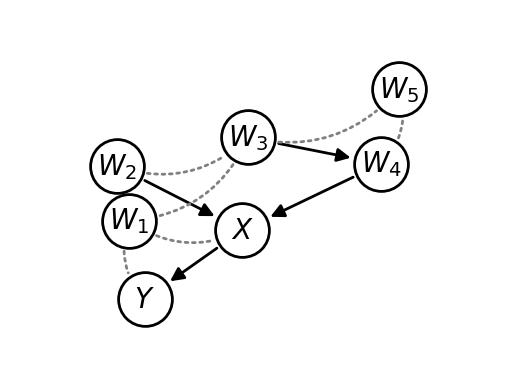

In [81]:
tian_pearl_figure_9a_graph.draw()

In [82]:
## Demo Tian Lemma 1(i)
topo = [W1, W3, W2, W4, X, Y]
part_1_graph = tian_pearl_figure_9a_graph.subgraph([Y, X, W1, W2, W3, W4])
result_1 = _tian_lemma_1_i(
    district=[Y, W1, W3, W2, X],
    topo=topo,
    graph_probability=part_1_graph.joint_probability(),
)
result_1

In _tian_lemma_1_i: topo = [W1, W3, W2, W4, X, Y]
In _tian_lemma_1_i: returning P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)


P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)

In [83]:
result_2 = _tian_lemma_1_i(
    district=[],
    topo=topo,
    graph_probability=part_1_graph.joint_probability(),
)

In _tian_lemma_1_i: topo = [W1, W3, W2, W4, X, Y]


TypeError: Error in _tian_lemma_1_i: the district or variable set from which it is drawn contained no variables.

In [84]:
result_3 = _tian_lemma_1_i(
    district=[Y, W1, W3, W2, X, Z],
    topo=topo,
    graph_probability=part_1_graph.joint_probability(),
)

In _tian_lemma_1_i: topo = [W1, W3, W2, W4, X, Y]


KeyError: 'Error in _tian_lemma_1_i: a variable in the district is not in the topological sort of the graph vertices.'

In [87]:
from IPython.display import Latex

In [94]:
## Demo _compute_c_factor()
expected_result_1 = Product.safe(
    [P(W1), P(W3 | W1), P(W2 | (W3, W1)), P(X | (W1, W3, W2, W4)), P(Y | (W1, W3, W2, W4, X))]
)
"""First test of the compute C factor subroutine, based on the example on page 29 of [tian03a]."""
result_1 = _compute_c_factor(
    district=[Y, W1, W3, W2, X],
    subgraph_variables=[X, W4, W2, W3, W1, Y],
    subgraph_probability=P(W1, W2, W3, W4, X, Y),
    graph_topo=list(tian_pearl_figure_9a_graph.topological_sort()),
)
# display(Latex(expected_result_1._repr_latex_()))
display(expected_result_1)
result_1
# self.assert_expr_equal(result_1, self.expected_result_1)

In _compute_c_factor: graph_topo = [W1, W3, W5, W2, W4, X, Y]
In _compute_c_factor: subgraph_topo = [W1, W3, W2, W4, X, Y]
In _tian_lemma_1_i: topo = [W1, W3, W2, W4, X, Y]
In _tian_lemma_1_i: returning P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)


P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)

P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)

In [91]:
# expected_result_1

P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)

In [96]:
## Demo Tian Lemma 3
"""First test of Lemma 3 in [tian03a]_ (Equation 69).

Source: The example on p. 30 of [Tian03a]_, run initially through [santikka20a]_.
"""
topo = [W1, W3, W5, W2, W4, X, Y]
# Q_T = Q[{W1, W2, W3, X, Y}]
subgraph_probability = Product.safe(
    [
        P(W1),
        P(W3 | W1),
        P(W2 | (W3, W1)),
        P(X | (W1, W3, W2, W4)),
        P(Y | (W1, W3, W2, W4, X)),
    ]
)
# The ancestors of {Y} in Figure 9(c) of [tian03a]_
ancestral_set = {W1, W2, X, Y}
subgraph_variables = {W1, W2, W3, X, Y}  # T in Figure 9(c) of [tian03a]_
result_1 = _tian_equation_69(
    ancestral_set=ancestral_set,
    subgraph_variables=subgraph_variables,
    subgraph_probability=subgraph_probability,
    graph_topo=topo,
)
expected_result_1 = Sum.safe(subgraph_probability, [W3])
print(expected_result_1)
# assert_expr_equal(expected_result_1, result_1)
print(result_1)
display(expected_result_1)
result_1

Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))
Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))


Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))

Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))

In [97]:
## Demo Tian Lemma 4(ii)
result_piece = Product.safe(
    [
        P(W1),
        P(W3 | W1),
        P(W2 | (W3, W1)),
        P(X | (W1, W3, W2, W4)),
        P(Y | (W1, W3, W2, W4, X)),
    ]
)
expected_result_1_part_1 = Fraction(
    Sum.safe(Sum.safe(result_piece, [W3]), [W2, X, Y]), One()
)  # Q[W1]/Q[\emptyset]
expected_result_1_part_2 = Fraction(
    Sum.safe(Sum.safe(result_piece, [W3]), [Y]), Sum.safe(Sum.safe(result_piece, [W3]), [X, Y])
)  # Q[X]/Q[W2]
expected_result_1_part_3 = Fraction(
    Sum.safe(result_piece, [W3]), Sum.safe(Sum.safe(result_piece, [W3]), [Y])
)  # Q[Y]/Q[X]
expected_result_1 = Product.safe(
    [expected_result_1_part_1, expected_result_1_part_2, expected_result_1_part_3]
)
expected_result_2_num = Sum.safe(expected_result_1, [W1])
expected_result_2_den = Sum.safe(Sum.safe(expected_result_1, [W1]), [Y])
expected_result_2 = Fraction(expected_result_2_num, expected_result_2_den)

result_1 = _tian_lemma_4_ii(
    district={W1, X, Y},
    graph_probability=Sum.safe(result_piece, [W3]),
    topo=list(tian_pearl_figure_9a_graph.subgraph({W1, W2, X, Y}).topological_sort()),
)
print(expected_result_1)
print(result_1)
# result_1

In Lemma 4(ii): vertex = Y
In _tian_equation_72: input vertex is Y
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X, Y]
In _tian_equation_72: input vertex is X
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X, Y]
In one_round with index > 1:
	topo: [W1, W2, X, Y]
	return_num: Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))
	return_den: Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))
	returning: ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

Index = 3, Q[H^(i)] = ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))
In Lemma 4(ii): vertex = W1
In _tian_

((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))
Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) * ((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W

In [24]:
expected_result_1

((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

In [25]:
result_1

Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) * ((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

In [98]:
## _compute_c_factor() applying Lemma 4
expected_result_1 = Product.safe(
    [P(W1), P(W3 | W1), P(W2 | (W3, W1)), P(X | (W1, W3, W2, W4)), P(Y | (W1, W3, W2, W4, X))]
)
expected_result_2_part_1 = Fraction(
    Sum.safe(Sum.safe(expected_result_1, [W3]), [W2, X, Y]), One()
)  # Q[W1]/Q[\emptyset]
expected_result_2_part_2 = Fraction(
    Sum.safe(Sum.safe(expected_result_1, [W3]), [Y]),
    Sum.safe(Sum.safe(expected_result_1, [W3]), [X, Y]),
)  # Q[X]/Q[W2]
expected_result_2_part_3 = Fraction(
    Sum.safe(expected_result_1, [W3]), Sum.safe(Sum.safe(expected_result_1, [W3]), [Y])
)  # Q[Y]/Q[X]
expected_result_2 = Product.safe(
    [expected_result_2_part_1, expected_result_2_part_2, expected_result_2_part_3]
)
result_1b = _compute_c_factor(
    district=[W1, X, Y],
    subgraph_variables=[W1, W2, X, Y],
    subgraph_probability=Sum.safe(expected_result_1, [W3]),
    graph_topo=list(tian_pearl_figure_9a_graph.topological_sort()),
)

In _compute_c_factor: graph_topo = [W1, W3, W5, W2, W4, X, Y]
In _compute_c_factor: subgraph_topo = [W1, W2, X, Y]
In _compute_c_factor: calling _tian_lemma_4_ii
In Lemma 4(ii): vertex = W1
In _tian_equation_72: input vertex is W1
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X, Y]
In _one_round: index = 0
  returning Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))

Index = 0, Q[H^(i)] = Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))
In Lemma 4(ii): vertex = X
In _tian_equation_72: input vertex is X
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X, Y]
In _tian_equation_72: input vertex is W2
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X, Y]
In one_round with index > 1:
	topo: [W1, W2, X, Y]
	return_num: Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))
	return_den: 

In [99]:
result_1b

Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) * ((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

In [100]:
expected_result_2

((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

In [101]:
expected_result_1

P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)

In [102]:
"""Third pass through the Identify() algorithm in Tian's 2003 example
"""
result_2 = _tian_lemma_4_ii(
    district={Y},
    graph_probability=Sum.safe(expected_result_1, [W1]),
    topo=list(tian_pearl_figure_9a_graph.subgraph({X, Y}).topological_sort()),
)
# self.assert_expr_equal(result, self.expected_result_2)

In Lemma 4(ii): vertex = Y
In _tian_equation_72: input vertex is Y
   and variables are {Y, X}
   and topo is [X, Y]
In _tian_equation_72: input vertex is X
   and variables are {Y, X}
   and topo is [X, Y]
In one_round with index > 1:
	topo: [X, Y]
	return_num: Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))
	return_den: Sum[Y](Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))
	returning: ((Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

Index = 1, Q[H^(i)] = ((Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))
Returning product: ((Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, 

In [29]:
expected_result_2

((Sum[W1](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))) / Sum[Y](Sum[W1](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | 

In [103]:
result_2

((Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W1](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

In _compute_c_factor: graph_topo = [W1, W3, W5, W2, W4, X, Y]
In _compute_c_factor: subgraph_topo = [W1, W2, X, Y]
In _compute_c_factor: calling _tian_lemma_4_ii
In Lemma 4(ii): vertex = W1
In _tian_equation_72: input vertex is W1
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X, Y]
In _one_round: index = 0
  returning Sum[W2, X, Y](Sum[W3](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))))

Index = 0, Q[H^(i)] = Sum[W2, X, Y](Sum[W3](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 

In [34]:
result_4

Sum[W2, X, Y](Sum[W3](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))))) * ((Sum[Y](Sum[W3](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W

In [36]:
expected_result_1

((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))

In [ ]:
## Let's put it all together and call Identify!

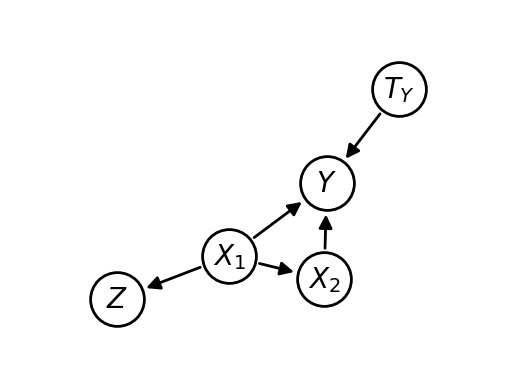

In [104]:
soft_interventions_figure_1b_graph.draw()

In [105]:
"""Test Line 2 of Algorithm 5 of [correa22a]_.

This tests the case where A == C.
"""
# π_star = Pi_star = Variable(f"π*")
test_1_identify_input_variables = {Z}  # A
test_1_identify_input_district = {Z}  # B

# @cthoyt @JZ The next two commented-out lines produce a mypy error:
# pi1 = Population("pi1")
# test_1_district_probability = PP[Population("pi1")](Z | X1)
# error: Type application targets a non-generic function or class  [misc]
# test_transport.py uses a similar syntax and does not trigger the error,
#   so I'm probably missing something simple.
test_1_district_probability = PP[Population("pi1")](Z | X1)  # Q
# pi1 = Population("pi1")
# test_1_district_probability = PP[pi1](Z | X1)
result = identify_variables_in_district(
    input_variables=frozenset(test_1_identify_input_variables),
    input_district=frozenset(test_1_identify_input_district),
    district_probability=test_1_district_probability,
    graph=soft_interventions_figure_1b_graph,
    topo=list(soft_interventions_figure_1b_graph.topological_sort()),
)
# logger.warning("Result of identify() call for test_identify_1 is " + str(result))
result
# self.assert_expr_equal(result, PP[Population("pi1")](Z | X1))

In tian_pearl_identify: A = C. Applying Lemma 3.
   Returning Q value: P(Z | X1)


P(Z | X1)

In [45]:
PP[Population("pi1")](Z | X1)

P(Z | X1)

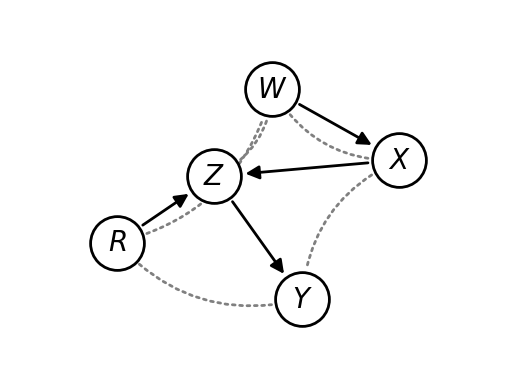

In [106]:
soft_interventions_figure_2a_graph.draw()

In [107]:
"""Test Line 3 of Algorithm 5 of [correa22a]_.

This tests the case where A == T.
Sources: a modification of the example following Theorem 2 in [correa20a]_
and the paragraph at the end of section 4 in [correa20a]_.
"""
result1 = identify_variables_in_district(
    input_variables=frozenset({R, Y}),
    input_district=frozenset({W, R, X, Z, Y}),
    district_probability=PP[Population("pi*")](
        W, R, X, Z, Y
    ),  # This is a c-factor if the input variables comprise a c-component
    graph=soft_interventions_figure_2a_graph,
    topo=list(soft_interventions_figure_2a_graph.topological_sort()),
)
# logger.warning("Result of identify() call for test_identify_2 part 1 is " + str(result1))
print(result1)
# self.assertIsNone(result1)

In tian_pearl_identify: A = T. Returning None (i.e., FAIL).


None


In [48]:
result2 = identify_variables_in_district(
    input_variables=frozenset({Z, R}),
    input_district=frozenset({R, X, W, Z}),
    district_probability=PP[Population("pi*")](R, W, X, Z),
    graph=soft_interventions_figure_3_graph.subgraph(vertices={R, Z, X, W}),
    topo=list(soft_interventions_figure_3_graph.topological_sort()),
)
print(result2)

In tian_pearl_identify: A = T. Returning None (i.e., FAIL).


None


In [67]:
unittest.TestCase.assertEqual

<function unittest.case.TestCase.assertEqual(self, first, second, msg=None)>

In [108]:
# A bit hacky but here so the notebook will run for a demo
def assert_expr_equal(expected: Expression, actual: Expression) -> None:
    """Assert that two expressions are the same."""
    example = unittest.TestCase()
    expected_outcomes, expected_treatments = get_outcomes_and_treatments(query=expected)
    actual_outcomes, actual_treatments = get_outcomes_and_treatments(query=actual)
    example.assertEqual(first=expected_treatments, second=actual_treatments)
    # self.assertEqual(expected_treatments, actual_treatments)
    example.assertEqual(expected_outcomes, actual_outcomes)
    ordering = sorted(expected.get_variables(), key=lambda x: str(x))
    expected_canonical = canonicalize(expected, ordering)
    actual_canonical = canonicalize(actual, ordering)
    example.assertEqual(
        expected_canonical,
        actual_canonical,
        msg=f"\nExpected: {str(expected_canonical)}\nActual:   {str(actual_canonical)}",
    )

In [109]:
"""Further test Lines 4-7 of Algorithm 5 of [correa22a]_.

Source: the example from page 29 of [tian03a]_.

Note: Tian and Pearl provide a simpler result that is due to using probabilistic
axioms to simplify the formula. This result is what we get when running Santikka's
implementation of identify in their R package, Causal Effect ([santikka20b]_), and is more
complex in its structure but easier to code for an initial Python implementation.
"""
result_piece_1 = Product.safe(
    [
        P(W1),
        P(W3 | W1),
        P(W2 | (W3, W1)),
        P(X | (W1, W3, W2, W4)),
        P(Y | (W1, W3, W2, W4, X)),
    ]
)
result_piece_2_part_1 = Fraction(
    Sum.safe(Sum.safe(result_piece_1, [W3]), [W2, X, Y]), One()
)  # Q[W1]/Q[\emptyset]
result_piece_2_part_2 = Fraction(
    Sum.safe(Sum.safe(result_piece_1, [W3]), [Y]),
    Sum.safe(Sum.safe(result_piece_1, [W3]), [X, Y]),
)  # Q[X]/Q[W2]
result_piece_2_part_3 = Fraction(
    Sum.safe(result_piece_1, [W3]), Sum.safe(Sum.safe(result_piece_1, [W3]), [Y])
)  # Q[Y]/Q[X]
result_piece_2 = Product.safe([result_piece_2_part_1, result_piece_2_part_2, result_piece_2_part_3])
expected_result = Fraction(
    Sum.safe(result_piece_2, [W1]),
    Sum.safe(Sum.safe(result_piece_2, [W1]), [Y]),
)  # Q[X,Y]/Q[X]
result_4 = identify_variables_in_district(
    input_variables=frozenset({Y}),
    input_district=frozenset({X, Y, W1, W2, W3, W4, W5}),
    district_probability=P(W1, W2, W3, W4, W5, X, Y),
    graph=tian_pearl_figure_9a_graph,
    topo=list(tian_pearl_figure_9a_graph.topological_sort()),
)
assert_expr_equal(expected=result_4, actual=expected_result)

In _compute_c_factor: graph_topo = [W1, W3, W5, W2, W4, X, Y]
In _compute_c_factor: subgraph_topo = [W1, W3, W2, W4, X, Y]
In _tian_lemma_1_i: topo = [W1, W3, W2, W4, X, Y]
In _tian_lemma_1_i: returning P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)
In tian_pearl_identify: about to recursively call tian_pearl_identify.
    C = frozenset({Y})
    T' = frozenset({W3, Y, W1, X, W2})
    Q[T'] =P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)
    graph nodes = [W1, W2, X, W3, W4, Y, W5]
    topo = [W1, W3, W5, W2, W4, X, Y]
In _compute_c_factor: graph_topo = [W1, W3, W5, W2, W4, X, Y]
In _compute_c_factor: subgraph_topo = [W1, W2, X, Y]
In _compute_c_factor: calling _tian_lemma_4_ii
In Lemma 4(ii): vertex = Y
In _tian_equation_72: input vertex is Y
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X, Y]
In _tian_equation_72: input vertex is X
   and variables are {Y, X, W1, W2}
   and topo is [W1, W2, X

In [113]:
print(str(result_4))
print(str(expected_result))
result_4

((Sum[W1](Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) * ((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))) / Sum[Y](Sum[W1](Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) * ((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Su

((Sum[W1](Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) * ((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))) / Sum[Y](Sum[W1](Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) * ((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Su

In [111]:
expected_result

((Sum[W1](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)) / Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X)))))) / Sum[Y](Sum[W1](((Sum[Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / Sum[X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))))) * ((Sum[W2, X, Y](Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | W1, W2, W3, W4, X))) / One())) * ((Sum[W3](P(W1) * P(W2 | W1, W3) * P(W3 | W1) * P(X | W1, W2, W3, W4) * P(Y | 

In [114]:
P({X} | {Y, Z})

P(X, Y, Z)

In [118]:
P(X | Y, Z)

P(X | Y, Z)

In [119]:
P(X | {Y, Z})

P(X | Y, Z)